# Clustering bike stations based on behavior

We define the behavior as the amount of bikes in a station throughout time. Two stations are said to have the same behavior if they are empty/full at around the same time. For example maybe that there stations that are often empty at around 8.30 AM because of people emptying them to go to work.

The goal of this notebook is to

1. determine what kind of behaviors exist,
2. examine if behavior is linked to location,
3. find out what clustering methods for finding similar stations work well.

## Behavior of a station

In [33]:
%matplotlib inline

# Seaborn hasn't been updated for the latest Matplotlib, but it's fine so we ignore the warnings
import warnings
warnings.filterwarnings('ignore') 

# Use IPython.display to prettily display tables
from IPython.display import display

import calendar
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
city_slug = 'toulouse'
station_slug = '00003-pomme'

df = pd.read_csv('data/{}/stations/{}.csv'.format(city_slug, station_slug))
df.set_index(pd.DatetimeIndex(df['moment']), inplace=True)

The behavior of a station can be represented visually by charting the heatmap of a contingency table of hours and days of the week. To do this a pivot has to be used.

In [31]:
df['Hour'] = df.index.hour + 1
df['Weekday'] = df.index.weekday
contingency = pd.pivot_table(df, values='bikes', index='Hour', columns='Weekday')
contingency.columns = [calendar.day_name[col] for col in contingency.columns]

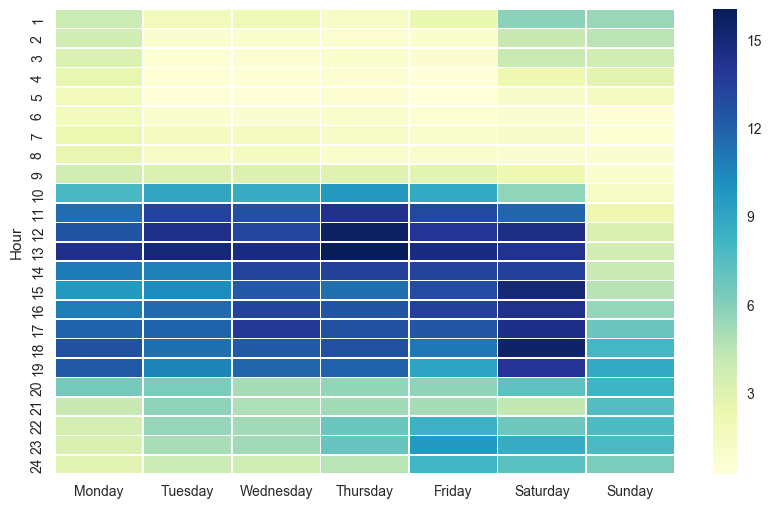

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency, linewidths=.5, cmap='YlGnBu')